# Correlations between Drug Classes

This notebook computes two types of correlation between our 75 drug classes:
- Volume correlation (TRx feature in our data)
- Price change correlation (Using the boolean change: whether price changed or not from past month)
- Price correlation (weighted by Volume)

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Importing plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

## Volume (TRx) Correlation

In [2]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly.csv')

# We only consider data pre_covid (pre 2020) for correlations
df = df[df.Year != 2020]

df.head(10)

,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,Date,Year,Month,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed
0,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_10,2014,10,0,NaN,0.0,244.16,NaN,0
1,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_11,2014,11,6,0.0,6.0,244.16,0.00000,0
2,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_12,2014,12,22,6.0,28.0,244.16,0.00000,0
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_01,2015,1,21,22.0,21.0,244.16,0.00000,0
4,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_02,2015,2,15,21.0,36.0,244.16,0.00000,0
5,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_03,2015,3,33,15.0,69.0,244.16,0.00000,0
6,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_04,2015,4,47,33.0,116.0,244.16,0.00000,0
7,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_05,2015,5,36,47.0,152.0,265.90,0.08904,1
8,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_06,2015,6,54,36.0,206.0,265.90,0.00000,0
9,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_07,2015,7,55,54.0,261.0,265.90,0.00000,0


In [3]:
# Creating a table containing total Volume (sum) per month for each drug class called trx
# We have NaN Values cause for some classes there are not info for certain dates
trx = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().copy()
trx.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,2590.0,NaN,1341997.0,559.0,66730.0,34008.0,69413.0,927023.0,2704.0,78288.0,...,5800045.0,700073.0,NaN,5788.0,155.0,1871470.0,543747.0,273977.0,61659.0,1052.0
2014_09,2865.0,NaN,1402067.0,617.0,65402.0,34105.0,73828.0,944109.0,2689.0,80983.0,...,6191906.0,700870.0,NaN,6000.0,124.0,1889276.0,545202.0,437213.0,48981.0,1158.0
2014_10,2656.0,NaN,1488239.0,594.0,74162.0,35069.0,71324.0,948974.0,2627.0,84325.0,...,6423192.0,720760.0,NaN,6244.0,131.0,1938759.0,564256.0,776294.0,43253.0,1160.0
2014_11,2503.0,NaN,1338267.0,619.0,77357.0,32128.0,36363.0,858943.0,2395.0,76945.0,...,5939195.0,652459.0,NaN,5404.0,137.0,1788978.0,516835.0,515860.0,41046.0,1004.0
2014_12,3078.0,NaN,1426282.0,1389.0,90556.0,35810.0,38264.0,921016.0,2531.0,87937.0,...,6806959.0,740609.0,NaN,6498.0,175.0,1998673.0,570719.0,431897.0,53042.0,1221.0


In [4]:
# Computing correlation matrix between the different classes based on volume
# Pandas will ignore NaN
trx_corr = trx.corr()
trx_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000,0.312560,0.729999,-0.543439,0.787014,0.802411,0.523791,0.573727,0.481008,-0.375694,...,0.428071,0.645505,-0.085946,0.274232,-0.493639,0.722007,0.653257,-0.154461,0.134179,0.613909
A05A1 CHOLERETICS+CHOLEKINETIC,0.312560,1.000000,0.366043,-0.194512,0.400317,0.388167,0.264315,0.135506,0.295576,-0.140959,...,0.284350,0.351528,0.131627,0.306348,-0.337069,0.372724,0.386495,-0.062689,0.046534,0.343713
ADHD,0.729999,0.366043,1.000000,-0.705456,0.774461,0.861718,0.663775,0.729820,0.752151,-0.576745,...,0.433197,0.839620,0.002497,0.257674,-0.799386,0.832262,0.707926,-0.152198,0.365628,0.815947
ALL OTHER RESPIRATORY,-0.543439,-0.194512,-0.705456,1.000000,-0.510434,-0.806172,-0.905020,-0.949833,-0.841230,0.890211,...,-0.134412,-0.879453,0.287968,-0.036659,0.852091,-0.819796,-0.618143,0.366597,-0.417869,-0.927940
ALL OTHER THERAPEUTICS,0.787014,0.400317,0.774461,-0.510434,1.000000,0.751933,0.361383,0.570262,0.542339,-0.481345,...,0.323551,0.666178,-0.220107,0.258860,-0.643656,0.700817,0.530207,-0.230441,0.116427,0.632771


In [5]:
# Formating the correlation matrix to make it easier for Tableau analysis
trx_corr_format = trx_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
trx_corr_format

# Saving csv file
# trx_corr_format.to_csv('trx_corr_since2014_noCovid.csv')

,row,column,corr
0,A.C.T.H.,A.C.T.H.,1.000000
1,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,0.312560
2,A.C.T.H.,ADHD,0.729999
3,A.C.T.H.,ALL OTHER RESPIRATORY,-0.543439
4,A.C.T.H.,ALL OTHER THERAPEUTICS,0.787014
...,...,...,...
5620,VITAMINS & MINERALS,THYROID ANTI-THYROID AND IODINE PREPS,0.923771
5621,VITAMINS & MINERALS,URINARY INCONTINENCE,0.728165
5622,VITAMINS & MINERALS,"VACCINES (PURE, COMB, OTHER)",-0.335145
5623,VITAMINS & MINERALS,VIRAL HEPATITIS,0.585660


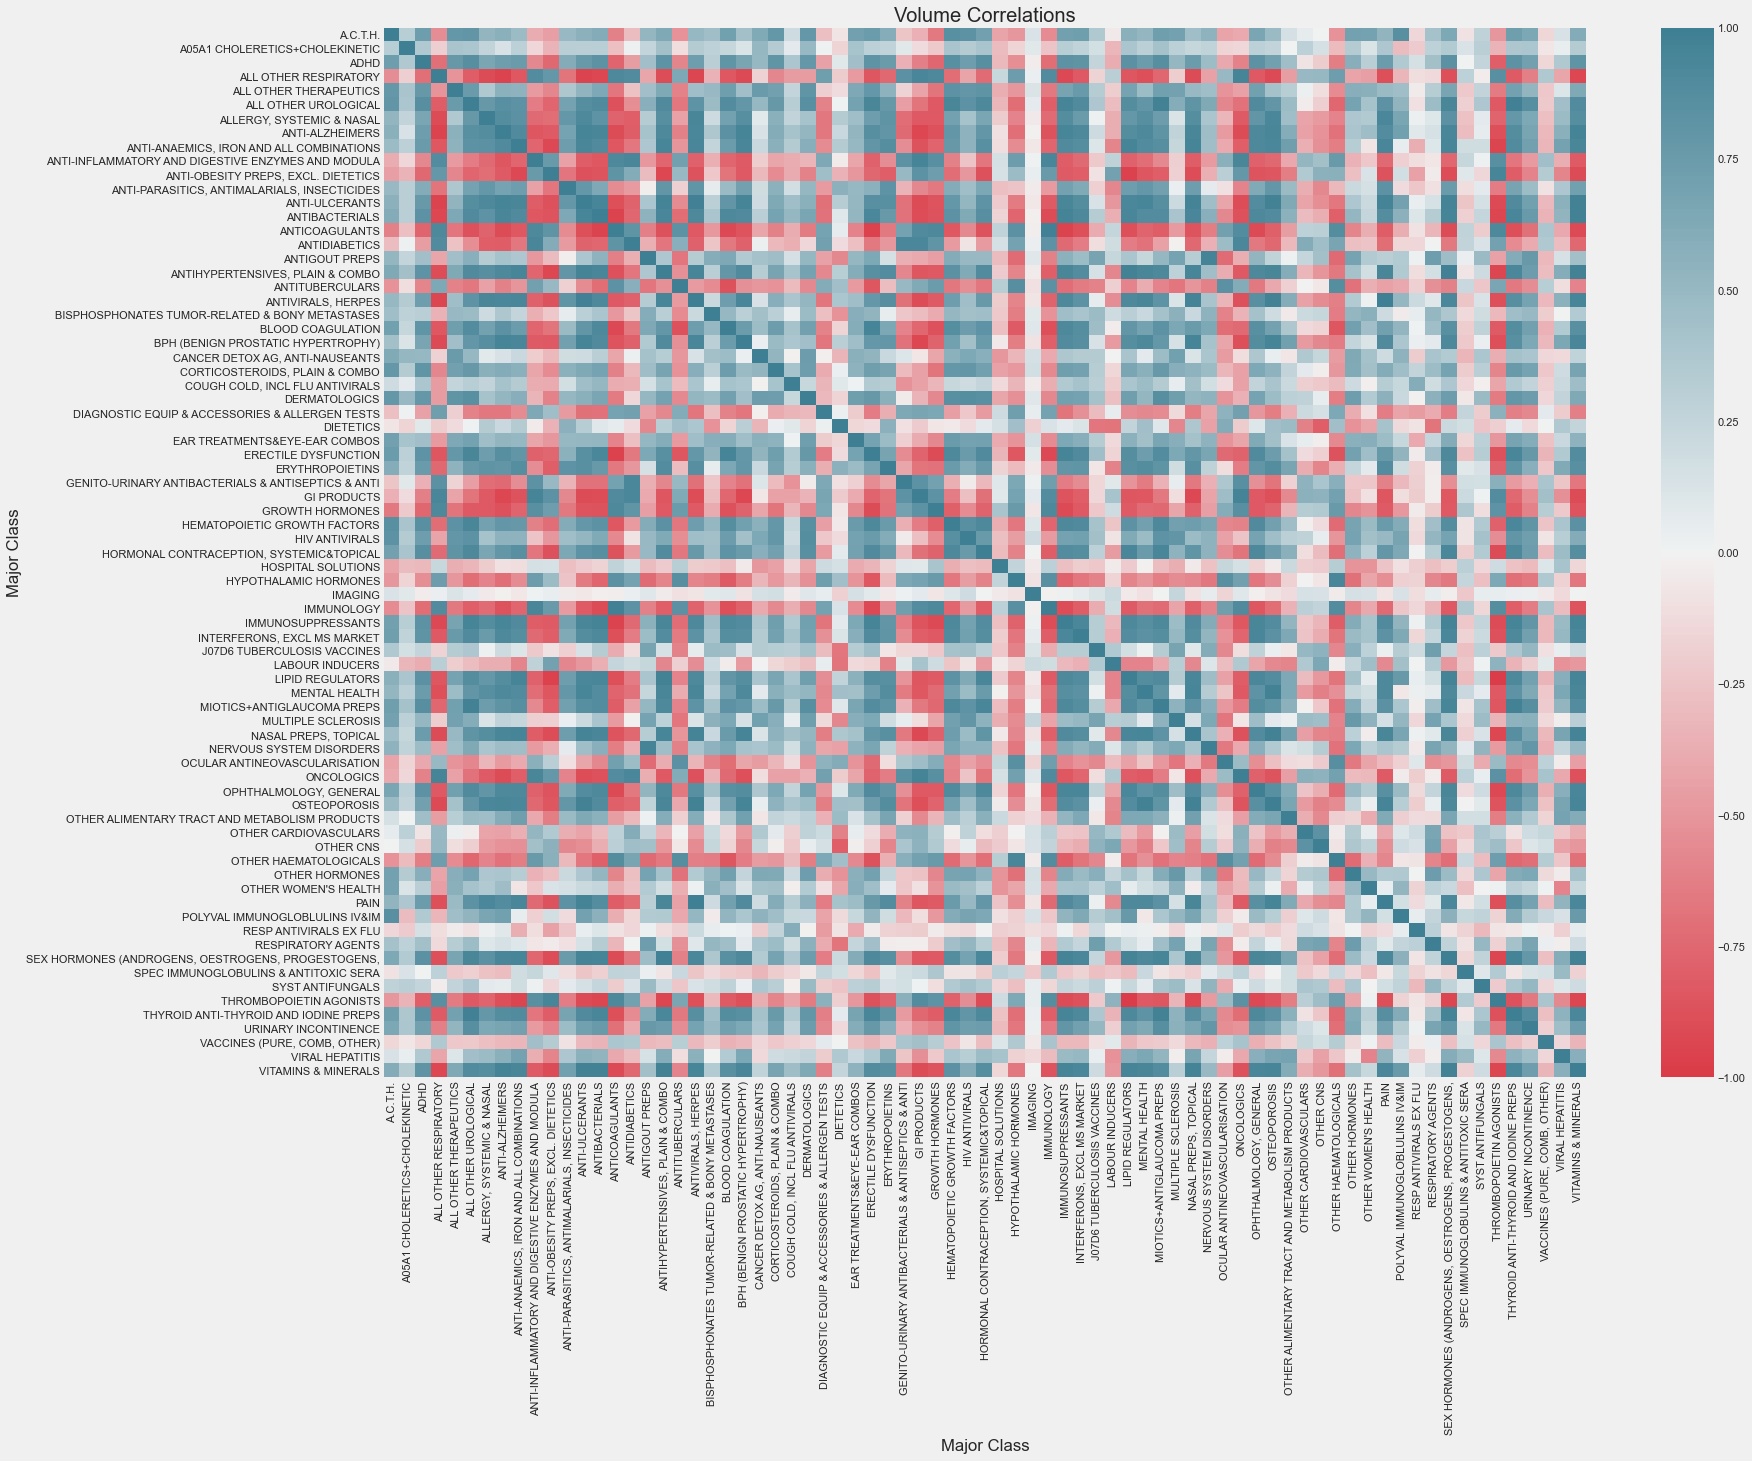

In [6]:
# plotting correlation matrix
plt.subplots(figsize=(24,18))
sns.heatmap(trx_corr, annot=False, cmap=sns.diverging_palette(10, 220, as_cmap=True), vmin = -1, vmax = 1, center = 0)
# plt.savefig('TRx_correlations_Major_class_noCovid.jpg', bbox_inches='tight', pad_inches=2)
plt.title('Volume Correlations')
plt.show()

## Price Changes Correlation

In [7]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly.csv')

# We only consider data pre_covid (pre 2020) for correlations
df = df[df.Year != 2020]

df.head(10)

,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,Date,Year,Month,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed
0,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_10,2014,10,0,NaN,0.0,244.16,NaN,0
1,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_11,2014,11,6,0.0,6.0,244.16,0.00000,0
2,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_12,2014,12,22,6.0,28.0,244.16,0.00000,0
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_01,2015,1,21,22.0,21.0,244.16,0.00000,0
4,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_02,2015,2,15,21.0,36.0,244.16,0.00000,0
5,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_03,2015,3,33,15.0,69.0,244.16,0.00000,0
6,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_04,2015,4,47,33.0,116.0,244.16,0.00000,0
7,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_05,2015,5,36,47.0,152.0,265.90,0.08904,1
8,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_06,2015,6,54,36.0,206.0,265.90,0.00000,0
9,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_07,2015,7,55,54.0,261.0,265.90,0.00000,0


In [8]:
# Creating a table containing total number of price changes (sum) from month to month for each drug class called changed
changed = df.groupby(['Major Class', 'Date']).Changed.sum().unstack().transpose().copy()
changed.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014_09,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014_10,0.0,NaN,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,...,3.0,3.0,NaN,0.0,0.0,0.0,0.0,15.0,0.0,0.0
2014_11,0.0,NaN,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,NaN,0.0,0.0,3.0,0.0,3.0,0.0,0.0
2014_12,1.0,NaN,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,0.0


We have a lot of NaN values cause some classes do not have data in certain years.

In [9]:
# Computing correlation matrix between the different classes based on price change
changed_corr = changed.corr()
changed_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000,NaN,0.445375,0.055139,0.243314,0.212122,0.117007,0.378207,0.195146,-0.077293,...,0.471362,0.534637,-0.047946,0.367955,0.458536,0.047254,0.381298,0.117298,0.672942,-0.058270
A05A1 CHOLERETICS+CHOLEKINETIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHD,0.445375,NaN,1.000000,0.124097,0.659314,0.421442,0.555633,0.761706,0.156470,0.274831,...,0.873599,0.795000,0.251153,0.843237,0.661836,0.513040,0.640645,0.137710,0.718713,-0.067964
ALL OTHER RESPIRATORY,0.055139,NaN,0.124097,1.000000,-0.011931,0.257906,0.178091,0.077371,0.147821,0.025444,...,0.199209,0.239571,0.109507,0.124683,0.245289,0.040745,-0.032617,0.195610,0.009398,-0.078396
ALL OTHER THERAPEUTICS,0.243314,NaN,0.659314,-0.011931,1.000000,0.256585,0.504115,0.579896,-0.124968,0.058214,...,0.618849,0.543032,0.243797,0.670592,0.673543,0.237604,0.660332,-0.044821,0.520845,-0.063904


In [10]:
# Formating the correlation matrix to make it easier for Tableau analysis
changed_corr = changed_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
changed_corr

# Saving csv file
# changed_corr.to_csv('price_chg_corr_since2014_noCovid.csv')

,row,column,corr
0,A.C.T.H.,A.C.T.H.,1.000000
1,A.C.T.H.,ADHD,0.445375
2,A.C.T.H.,ALL OTHER RESPIRATORY,0.055139
3,A.C.T.H.,ALL OTHER THERAPEUTICS,0.243314
4,A.C.T.H.,ALL OTHER UROLOGICAL,0.212122
...,...,...,...
5316,VITAMINS & MINERALS,THYROID ANTI-THYROID AND IODINE PREPS,-0.078646
5317,VITAMINS & MINERALS,URINARY INCONTINENCE,0.009346
5318,VITAMINS & MINERALS,"VACCINES (PURE, COMB, OTHER)",-0.093405
5319,VITAMINS & MINERALS,VIRAL HEPATITIS,0.009570


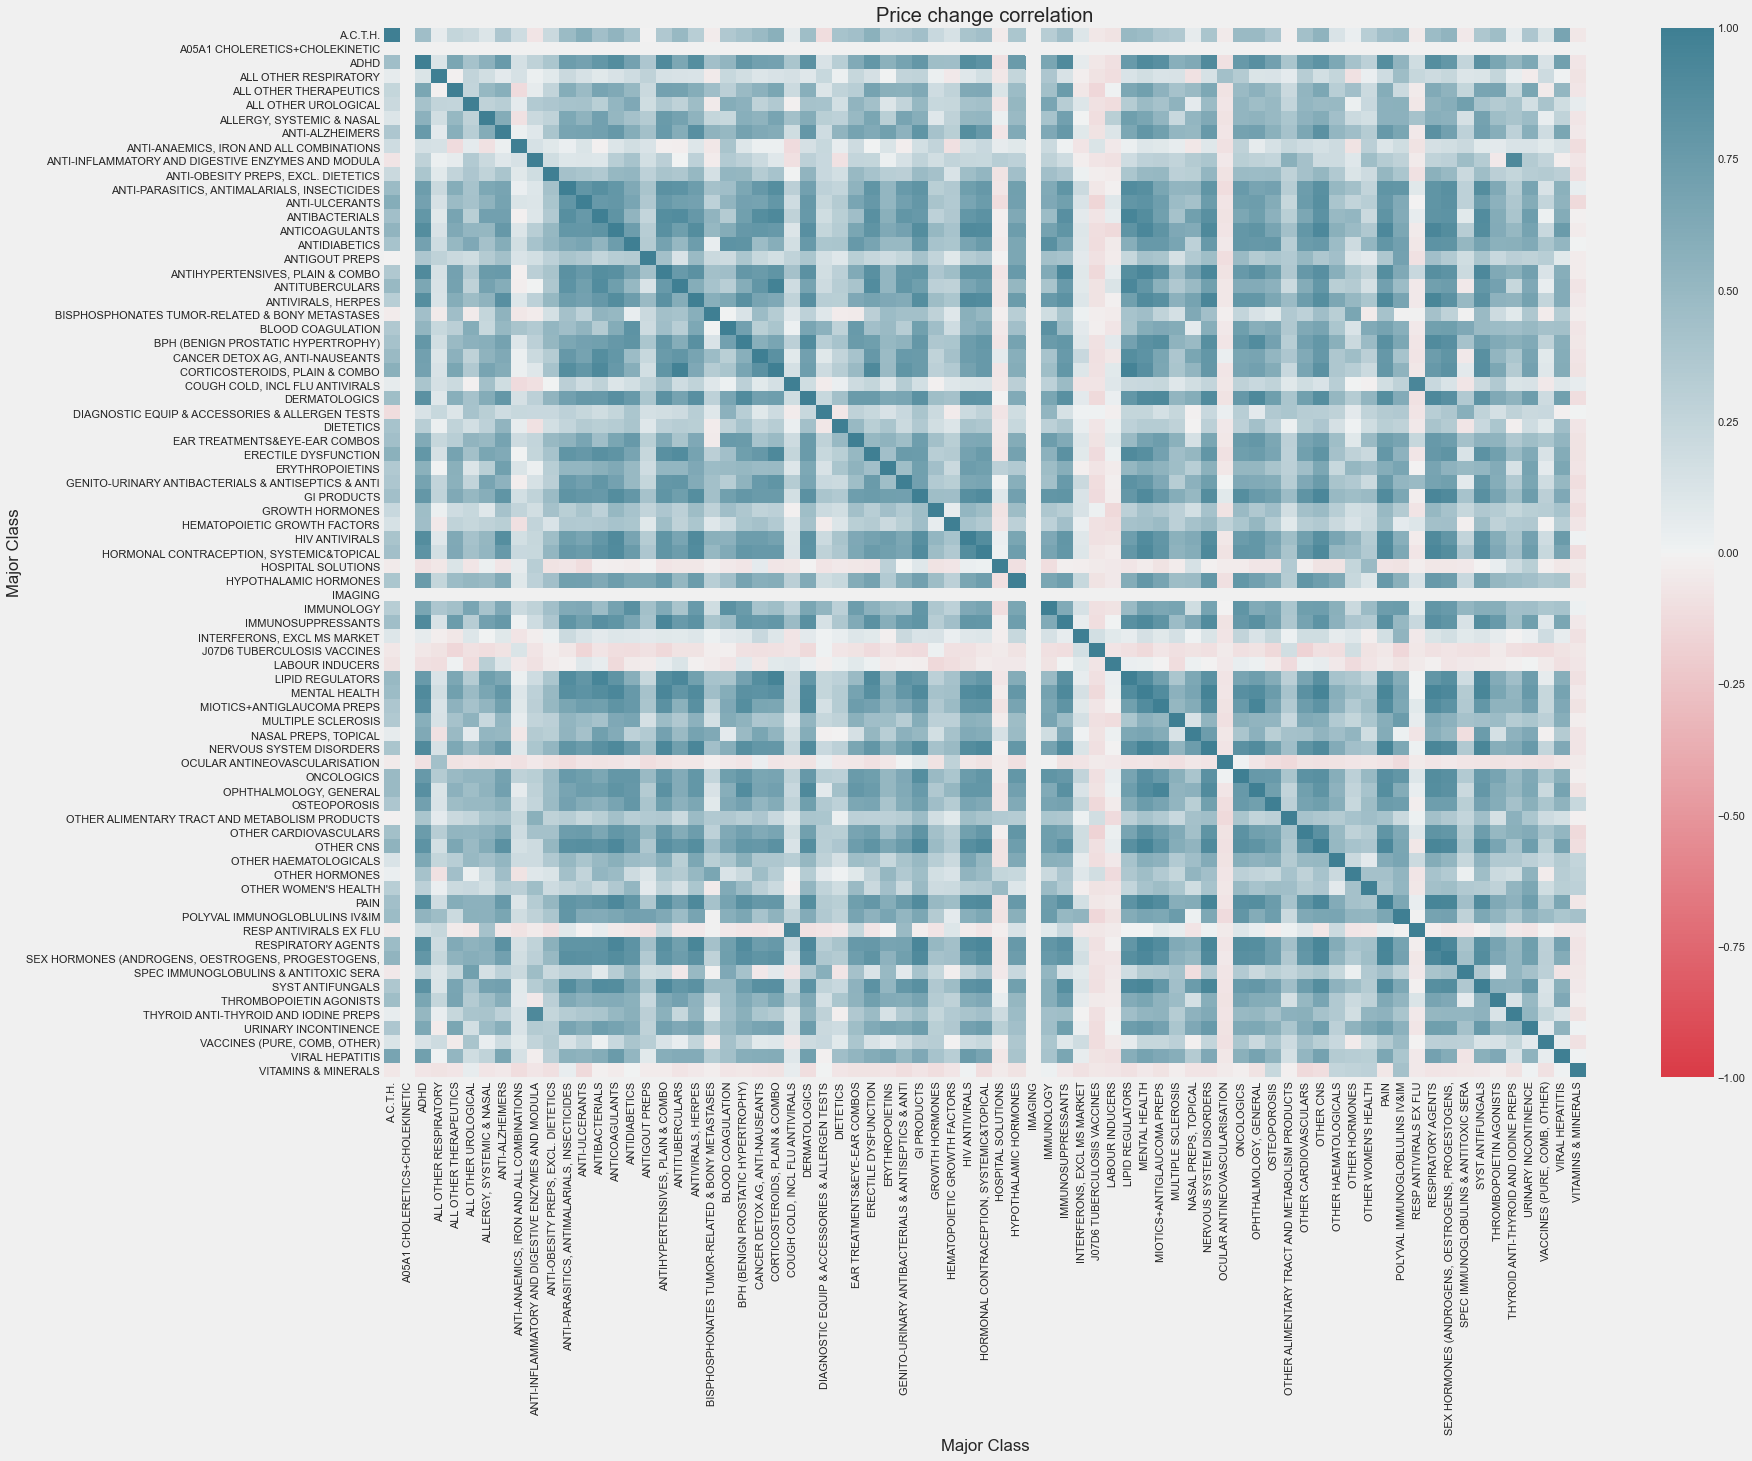

In [11]:
# plotting correlation matrix
plt.subplots(figsize=(24,18))
sns.heatmap(changed.corr(), annot=False, cmap=sns.diverging_palette(10, 220, as_cmap=True), vmin = -1, vmax = 1, center = 0)
# plt.savefig('Price_chanced_correlations_Major_class_noCovid.jpg', bbox_inches='tight', pad_inches=2)
plt.title("Price change correlation")
plt.show()

## Volume (TRx) weighted price (WAC) Correlation

In [12]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly.csv')

# We only consider data pre_covid (pre 2020) for correlations
df = df[df.Year != 2020]

# Correcting nan values for Volume
df['TRx'] = df['TRx'].fillna(0)

df.head(10)

,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,Date,Year,Month,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed
0,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_10,2014,10,0,NaN,0.0,244.16,NaN,0
1,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_11,2014,11,6,0.0,6.0,244.16,0.00000,0
2,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_12,2014,12,22,6.0,28.0,244.16,0.00000,0
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_01,2015,1,21,22.0,21.0,244.16,0.00000,0
4,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_02,2015,2,15,21.0,36.0,244.16,0.00000,0
5,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_03,2015,3,33,15.0,69.0,244.16,0.00000,0
6,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_04,2015,4,47,33.0,116.0,244.16,0.00000,0
7,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_05,2015,5,36,47.0,152.0,265.90,0.08904,1
8,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_06,2015,6,54,36.0,206.0,265.90,0.00000,0
9,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_07,2015,7,55,54.0,261.0,265.90,0.00000,0


In [13]:
# Helper function to compute the WAC weighted by TRx
def weigthed_average(data, quantity, weights):
    try:
        return (data[quantity] * data[weights]).sum() / data[weights].sum()
    except ZeroDivisionError:
        return data[quantity]
    
# Creating a table containing volume weighted WAC from month to month for each drug class called weighted_price
weighted_price = df.groupby(['Major Class', 'Date']).apply(weigthed_average, 'WAC', 'TRx').unstack().transpose()
weighted_price.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,6325.2,NaN,7.837549,426.716670,10.291356,6.365981,6.206431,7.751813,5.434058,3.654753,...,17.968968,31.953912,NaN,49.738528,1867.725806,1.870540,7.382365,141.759162,671.767913,2.068927
2014_09,6325.2,NaN,7.787941,426.716670,10.773946,6.208458,6.240965,7.449293,5.733658,3.692081,...,17.945859,35.463267,NaN,53.102875,1900.302419,1.854288,7.382947,150.190400,727.680395,2.051075
2014_10,6325.2,NaN,7.771469,422.237882,10.158307,6.185804,6.687023,7.638758,5.428756,3.725409,...,18.207621,37.253086,NaN,48.042183,1880.988550,1.862533,7.390121,169.071422,771.498023,2.063805
2014_11,6325.2,NaN,7.781657,357.339807,9.361015,6.185791,5.695030,7.674109,5.545514,3.758719,...,18.004349,35.492405,NaN,50.246807,1916.551095,1.884808,7.396961,175.899458,832.885544,2.061356
2014_12,6452.0,NaN,8.023357,238.348097,9.263849,6.182288,5.514974,7.770223,5.950780,3.773503,...,18.083178,27.343266,NaN,53.412550,1815.851429,1.885013,7.402244,179.180652,885.188850,2.058279


We have a lot of NaN values cause some classes do not have data in certain years.

In [14]:
# Computing correlation matrix between the different classes based on price change
weighted_price_corr = weighted_price.corr()
weighted_price_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000e+00,-8.013278e-15,8.998739e-01,-2.057711e-01,9.555793e-01,9.715747e-01,7.684920e-01,9.542344e-01,9.355680e-01,9.677260e-01,...,8.695414e-01,9.008153e-01,-9.715303e-02,8.839710e-01,-7.771939e-01,-9.077249e-02,9.620700e-01,-3.917477e-01,-8.932652e-01,7.702144e-01
A05A1 CHOLERETICS+CHOLEKINETIC,-8.013278e-15,1.000000e+00,-6.705818e-16,-2.581036e-15,-3.860681e-16,-1.160854e-15,9.482108e-16,1.778982e-15,1.152216e-15,-3.520742e-16,...,-7.268501e-16,-2.796927e-16,-2.782734e-17,-2.563515e-16,-3.911612e-16,-3.399362e-16,4.502141e-16,-1.538840e-15,5.965979e-16,-3.850320e-15
ADHD,8.998739e-01,-6.705818e-16,1.000000e+00,-4.583505e-01,8.083726e-01,9.164547e-01,5.339265e-01,9.653723e-01,8.673895e-01,9.203165e-01,...,8.574729e-01,8.758721e-01,7.459737e-02,8.596272e-01,-8.696443e-01,1.123799e-01,9.366453e-01,-3.882246e-01,-6.867348e-01,7.240490e-01
ALL OTHER RESPIRATORY,-2.057711e-01,-2.581036e-15,-4.583505e-01,1.000000e+00,-4.387714e-02,-2.387775e-01,2.155928e-01,-3.097501e-01,-1.456880e-01,-2.428882e-01,...,-1.376617e-01,-1.772114e-01,3.189351e-03,-2.186578e-01,4.346961e-01,-4.669572e-01,-2.496741e-01,6.537079e-02,-1.702967e-01,-6.367102e-03
ALL OTHER THERAPEUTICS,9.555793e-01,-3.860681e-16,8.083726e-01,-4.387714e-02,1.000000e+00,9.387746e-01,8.422959e-01,9.008723e-01,9.140362e-01,9.430458e-01,...,8.376655e-01,8.703721e-01,-2.927825e-01,8.431621e-01,-6.971482e-01,-2.153978e-01,9.257965e-01,-4.542529e-01,-9.515309e-01,7.584088e-01


In [15]:
# Formating the correlation matrix to make it easier for Tableau analysis
weighted_price_corr = weighted_price_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
weighted_price_corr

# Saving csv file
# weighted_price_corr.to_csv('weighted_price_corr_since2014_noCovid.csv')

,row,column,corr
0,A.C.T.H.,A.C.T.H.,1.000000e+00
1,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,-8.013278e-15
2,A.C.T.H.,ADHD,8.998739e-01
3,A.C.T.H.,ALL OTHER RESPIRATORY,-2.057711e-01
4,A.C.T.H.,ALL OTHER THERAPEUTICS,9.555793e-01
...,...,...,...
5614,VITAMINS & MINERALS,THYROID ANTI-THYROID AND IODINE PREPS,-2.655609e-01
5615,VITAMINS & MINERALS,URINARY INCONTINENCE,8.388256e-01
5616,VITAMINS & MINERALS,"VACCINES (PURE, COMB, OTHER)",-4.793806e-01
5617,VITAMINS & MINERALS,VIRAL HEPATITIS,-8.274665e-01


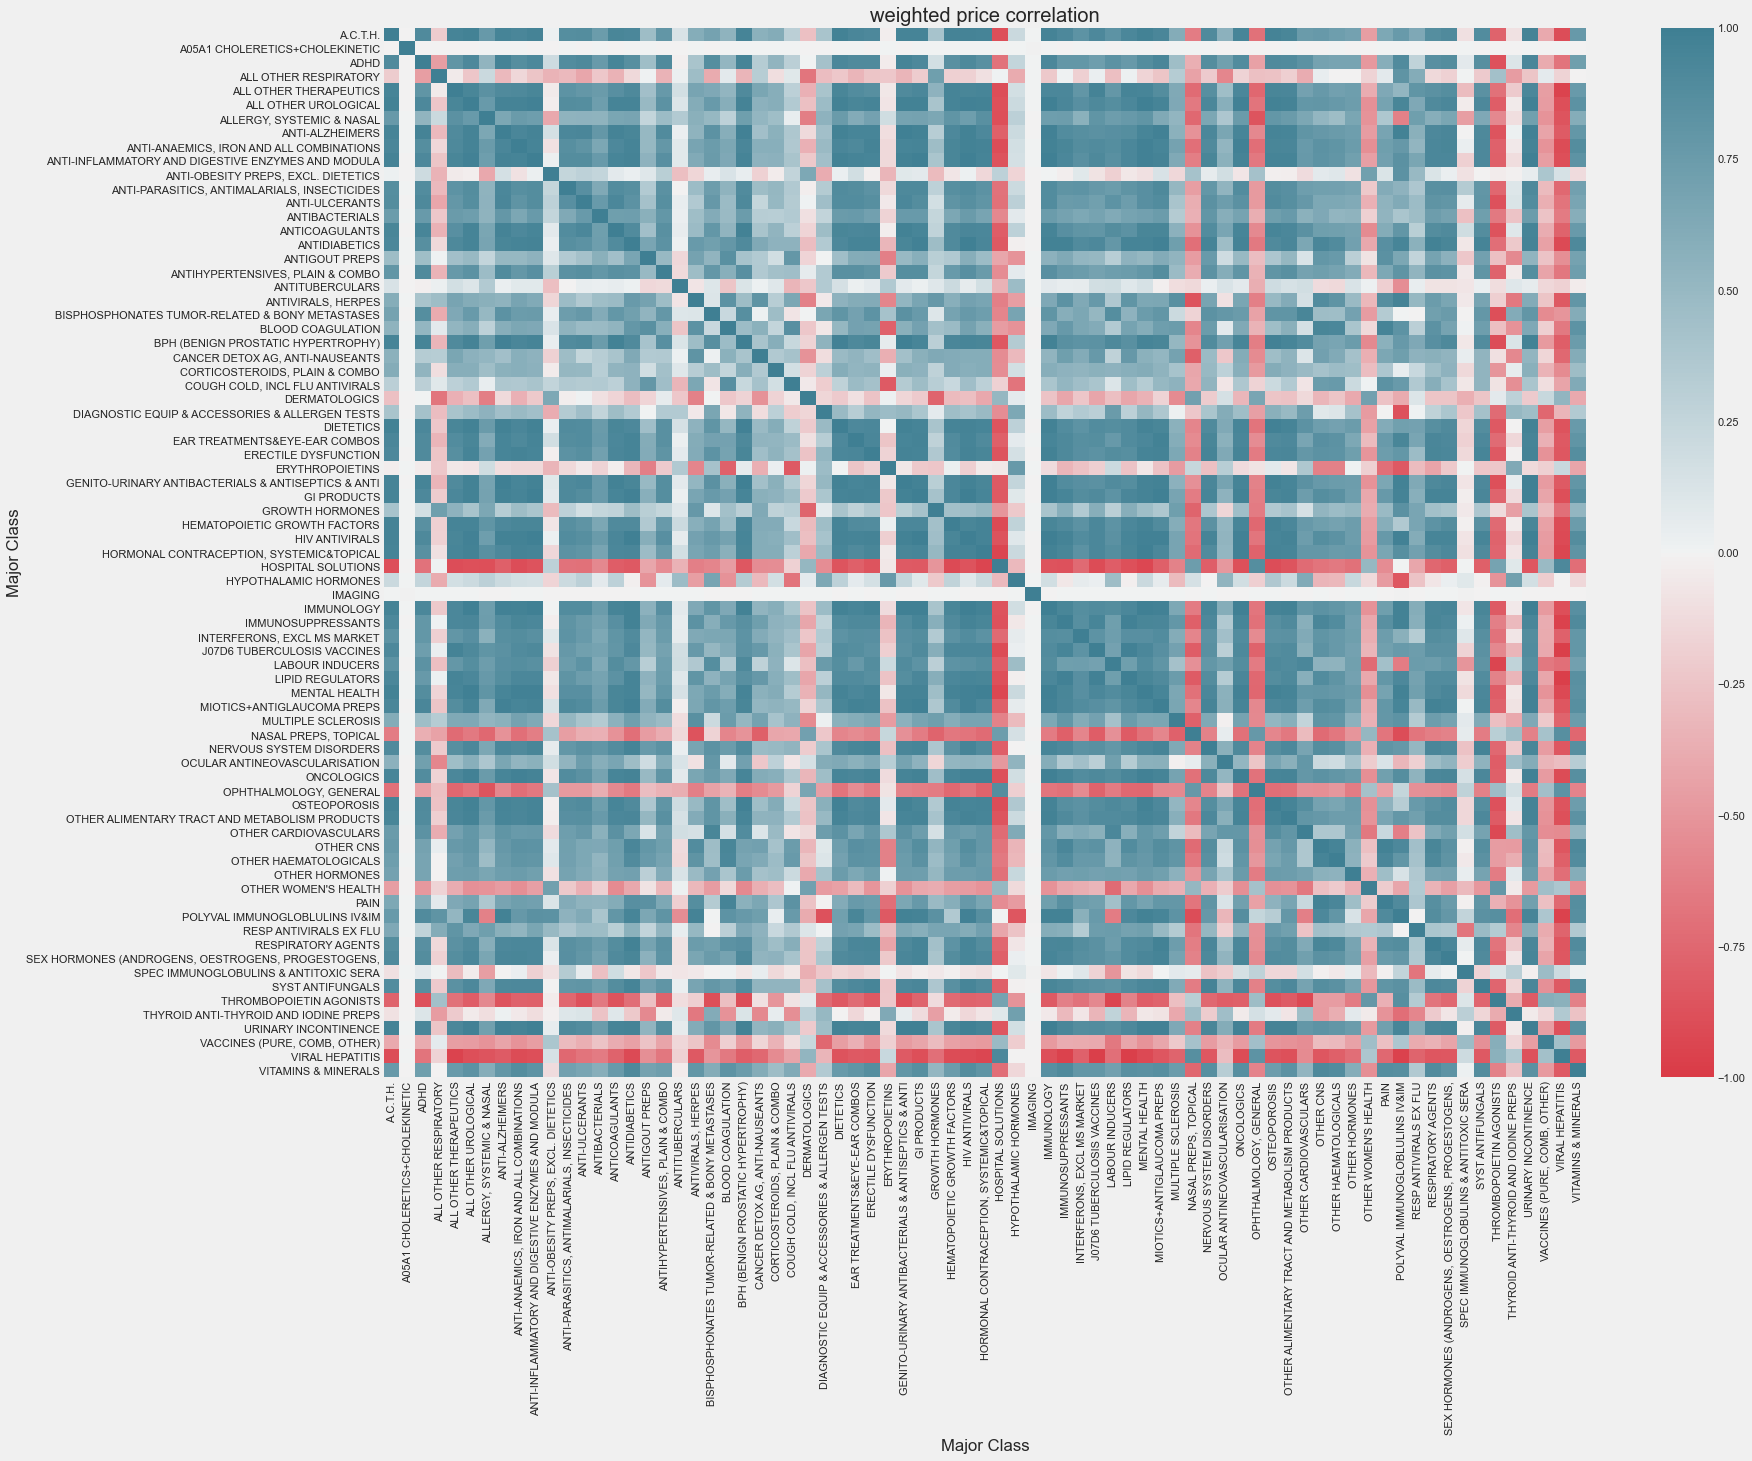

In [16]:
# plotting correlation matrix
plt.subplots(figsize=(24,18))
sns.heatmap(weighted_price.corr(), annot=False, cmap=sns.diverging_palette(10, 220, as_cmap=True), vmin = -1, vmax = 1, center = 0)
# plt.savefig('weighted_price_correlations_Major_class.jpg', bbox_inches='tight', pad_inches=2)
plt.title("weighted price correlation")
plt.show()